* Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Or, alternatively, **Restart & Run All**.

* Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

* You can always add additional cells to the notebook to experiment, to test your answers, or to provide additional support for your answers.

* You should not need to install new packages to complete an assignment. If you use any packages not available via the MATH405 `Project.toml` then your assignment will likely not be graded correctly.

* Submissions are only accepted via CANVAS!

* Late submissions: within 24h I will reduce the grade to 70%. I will not accept submissions after 24h. Please manage your time well and complete the assignments with plenty of buffer time.

* By entering your name below you confirm that you have completed this assignment on your own and without (direct) help from your colleagues. Plagiarism / copying will be checked by comparing assignments and by by testing understanding in workshops and the oral exam (final). I reserve the option to downgrade an assignment at any point.

In [1]:
NAME = "Owen Sheekey"

"Owen Sheekey"

---

# MATH 405/607 

# Numerical Methods for Differential Equations

## Assignment 5: Spectral Methods 

#### Notes

* **Due date:** Wed Dec 2, 2020, 1200 noon
* This assignment will be worth 10% of the overall grade.
* Answer only question 3 or question 4 but not both.

* [Question 1 : Approximation vs Regularity](#q1)
* [Question 2 : Trapezoidal Rule](#q2)
* [Question 3 : Fourth order bvp](#q3)
* [Question 4 : Advection Problem](#q4)
* [Question 5 : Eigenvalue Problem](#q5)


In [4]:
include("math405.jl")

# Here are the codes you need to construct and evaluate trigonometric interpolants

using FFTW
"construct a real-space grid - use FFT convention"
xgrid(N) = range(0.0, stop=2π-2π/2N, length=2N)
"construct the reciprocal space grid assumed by `fft` - carefully use FFT convention"
kgrid(N) = [0:N; -N+1:-1]
"compute the fourier coefficients of I_N"
fouriercoeffs(f::Function, N) = fouriercoeffs(f.(xgrid(N)))
fouriercoeffs(F::Vector) = fft(F) / length(F)
"evaluate a trigonometric polynomial"
eval_trig(F::Function, N, Z) = eval_trig(fouriercoeffs(F, N), Z)
eval_trig(F̂::Vector, Z) = real(sum( f̂k * exp.((im * k)*Z) for (f̂k, k) in zip(F̂, kgrid(length(F̂)÷2)) ))

# To evaluate the trigonometric interpolant of a function F 
# at several points Zs::AbstractVector use the following function 
eval_trig(F::Function, N::Integer, Zs::AbstractVector) = eval_trig.( Ref(fouriercoeffs(F, N)), Zs )

 Activating environment at `~/Documents/UBC/Math/Math 405/math405_2020W/assignments/A5/Project.toml`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1278
┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1278
┌ Info: Precompiling FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1278


eval_trig (generic function with 3 methods)

<a name = 'q1'></a>
### Question 1: Approximation vs Regularity [15]

Let $f : \mathbb{R} \to \mathbb{R}$ be continuous and $2\pi$-periodic and let $I_N f$ denote its degree $N$ trigonometric interpolant.

In class we have proven (mostly) that if $f$ is analytic and bounded, $|f| \leq M$, in the strip $\{ |{\rm Im} z| \leq \alpha \}$ then 
$$
  \| f - I_N f \|_\infty \lesssim (\log N) M e^{-\alpha N}.  
$$
Similarly, the **Jackson Theorem(s)** state that, if $f$ is $2\pi$-periodic, $p$ times continuously differentiable and the $p$th derivative $f^{(p)}$ is $s$-Hölder continuous, $s \in (0, 1]$, i.e.
$$
    |f^{(p)}(x) - f^{(p)}(y)| \leq C |x - y|^s
$$
then 
$$
    \|f - I_N f\|_\infty \lesssim (\log N) |N|^{-p-s}.
$$
The prototype of an  $s$-Hölder continuous function is $|x|^s$. A piecewise smooth function with finitely many $|x|^s$ singularities is also $s$-H\"{o}lder continuous in the sense defined above.

The $\log N$ factor is a technicality, very difficult to see numerically (if it is indeed sharp), and should simply be ignored for this Question. 

Following the Model solution, produce figures demonstrating the algebraic or exponential convergence rates stated in the above estimates. As in the model solution in addition to plotting the convergence, also print your predicted rate of convergence.

(i) $f(x) = |\sin(x)|$

(ii) $f(x) = |\sin(x)|^5$

(iii) $f(x) = |\sin(x)|^{7/3}$

(iv) $f(x) = \dfrac{1}{1 + \exp(10 \sin(x))}$

Rate for 1 / (1+sin(x)^2): error ~ exp(- 0.87 N)


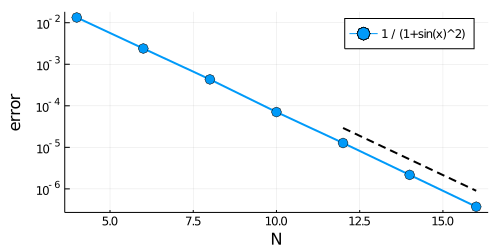

In [5]:
# Model Solution 
f = x -> 1 / (1+sin(x)^2)
NN = 4:2:16
xerr = range(0, 2*pi, length=10_000)
Err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf) for N in NN ]
println("Rate for 1 / (1+sin(x)^2): error ~ exp(- 0.87 N)")
plot(NN, Err, lw=2, label = "1 / (1+sin(x)^2)", ms=5, m=:o, size = (500, 250), yscale = :log10, 
     xlabel = "N", ylabel = "error")
plot!(NN[5:end], exp.(- 0.87 * NN[5:end]), lw=2, c=:black, ls = :dash, label = "")


Rate for |sin x|: error ~ 0.5(logN)/N^1.3
Rate for |sin x|^5: error ~ 40 (logN)/ N^5.7
Rate for |sin x|^(7/3): error ~ 0.4 (logN)/N^2.7
Rate for 1/ (1 + exp(10 sin(x))): error ~ exp(- 0.3 N)


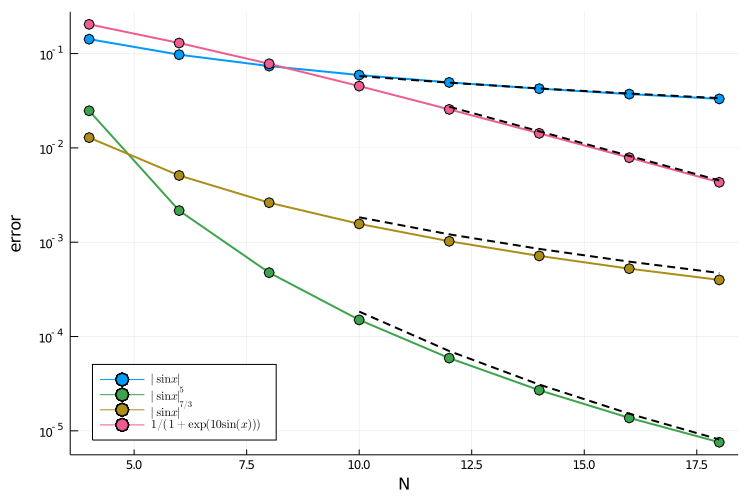

In [76]:
f = x -> abs(sin(x))
NN = 4:2:18
xerr = range(0, 2*pi, length=10_000)
Err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf) for N in NN ]
println("Rate for |sin x|: error ~ 0.5(logN)/N^1.3")
plot(NN, Err, lw=2, label = L"|\sin x|", ms=5, m=:o, size = (500, 250), yscale = :log10, 
     xlabel = "N", ylabel = "error")
plot!(NN[4:end],  0.5 ./ (NN[4:end].^1.3) .* log.(NN[4:end]), lw=2, c=:black, ls = :dash, label = "")

f = x -> abs(sin(x))^5
Err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf) for N in NN ]
println("Rate for |sin x|^5: error ~ 40 (logN)/ N^5.7")
plot!(NN, Err, lw=2, label = L"|\sin x|^5", ms=5, m=:o, yscale = :log10, 
     xlabel = "N", ylabel = "error")
plot!(NN[4:end], 40 ./ (NN[4:end].^5.7) .* log.(NN[4:end]), lw=2, c=:black, ls = :dash, label = "")

f = x -> abs(sin(x))^(7/3)
Err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf) for N in NN ]
println("Rate for |sin x|^(7/3): error ~ 0.4 (logN)/N^2.7")
plot!(NN, Err, lw=2, label = L"|\sin x|^{7/3}", ms=5, m=:o, yscale = :log10, 
     xlabel = "N", ylabel = "error")
plot!(NN[4:end], 0.4 ./ (NN[4:end].^2.7) .* log.(NN[4:end]), lw=2, c=:black, ls = :dash, label = "")

f = x -> 1/ (1 + exp(10*sin(x)))
Err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf) for N in NN ]
println("Rate for 1/ (1 + exp(10 sin(x))): error ~ exp(- 0.3 N)")
plot!(NN, Err, lw=2, label = L"1/ \left( 1 + \exp(10 \sin(x))\right)", ms=5, m=:o, size = (750, 500), yscale = :log10, 
     xlabel = "N", ylabel = "error", legend=:bottomleft)
plot!(NN[5:end], exp.(- 0.3 * NN[5:end]), lw=2, c=:black, ls = :dash, label = "")

<a name = 'q2'></a>



### Question 2: Periodic Trapezoidal Rule  [3 + 5 + 3 + 4]

Let $f : \mathbb{R} \to \mathbb{R}$ be continuous and $2\pi$-periodic, then we can represent it in terms of its Fourier series, 
$$ 
    f(x) = \sum_{k \in \mathbb{Z}} \hat{f}_k e^{i k x}.
$$
We are interested in approximating the integral 
$$
    I := \int_{-\pi}^\pi f(x) \,dx 
$$
by the trapezoidal rule 
$$
    I_N := \frac{2\pi}{2N} \sum_{n = -N+1}^N f\big(n\pi/N\big).
$$
In the following tasks you may interchange limits freely without rigorous justification, in particular summation and integration.

(a) Prove that $I = 2 \pi \hat{f}_0$.

(b) Prove that 
$$
    \sum_{n = -N+1}^N e^{i k \pi n / N} = 
    \begin{cases} 
        2N, & k \in 2N \mathbb{Z},  \\ 
        0, & \text{otherwise}.
    \end{cases}
$$
and use this to deduce that 
$$
    I_N = 2\pi \sum_{k \in 2N\mathbb{Z}} \hat{f}_k.
$$
*REMARK: $k \in 2 N \mathbb{Z}$ means that $k = 2 N m$ for some integer $m$.*


(c) Deduce from (a, b) that 
$$
    |I_N - I| \leq 2\pi \sum_{k \in 2N\mathbb{Z} \setminus \{0\}} |\hat{f}_k|.
$$

(d) Suppose that (i) $|\hat{f}_k| \leq M e^{-\alpha |k|}$; or (ii) $|\hat{f}_k| \leq C |k|^{-p}$. In each case deduce from (c)  a sharp (up to constants) estimate on the error $|I_N - I|$.

HINT: If $\eta(x)$ is non-negative and monotonically decreasing then $\sum_{k = K+1}^\infty \eta(k) \leq \int_{K}^\infty \eta(x) dx$.

YOUR ANSWER HERE

Solve **either** Q.3 (theoretical) **or** Q.4 (computational). 

<a name = 'q3'></a>

### Question 3: Fourth-order BVP [5 + 5 + 5]

Consider the periodic boundary value problem for the differential equation 
$$
    u_{xxxx} + u = f 
$$

(a) Prove that, if $u$ solves the above DE, then 
$$ 
    \|u\|_{H^2} := ( \|u_{xx}\|_{L^2}^2+\|u\|_{L^2}^2 )^{1/2} \leq \|f\|_{L^2}.
$$
where $\|f\|_{L^2} := (\int_0^{2\pi} f^2 dx )^{1/2}$.  
*[HINT: multiply the DE by $u$, then integrate over $[0, 2\pi]$, integrate by parts, then use the Cauchy-Schwarz inequality on the right-hand side.]*

(b) Derive the canonical Fourier spectral method for this problem, providing both the real-space formulation as well as the fully discrete formulation in reciprocal space. Briefly specify all your terms.


(c) Suppose that $f$ is analytic and bounded in the strip $\{ |{\rm Im} z| \leq \alpha \}$, prove that 
$$
     \|u - u_N \|_{H^2} \leq C e^{-\alpha N}.
$$
where $u_N$ denotes the solution to the Fourier-spectral method from (a) and $u$ the exact solution of the DE.


YOUR ANSWER HERE

**BONUS [NO CREDIT]** 

Q3(d) Employing the method of manufactured solutions, confirm your prediction Question 3a-c.

In [ ]:
# YOUR CODE HERE

<a name = 'q4'></a> 

### Question 4: transport equation  [5+5+5]

Consider the advector equation with periodic boundary conditions and non-constant advection speed, $c(x)$ which is analytic and $2\pi$-periodic: 
$$
    u_t + (c(x) u)_x = 0 
$$

(a) Discretise in space using a Fourier spectral method and write down the resulting ODE for the Fourier coefficients, in terms of the following operators:
* ${\rm DFT}$ : discrete Fourier transform
* ${\rm IDFT}$ : inverse discrete Fourier transform 
* $I_N$ : trigonometric interpolant


YOUR ANSWER HERE

(b) Implement a practical scheme (you will need to discretise in time by implementing a suitable time-stepping yourself or using a suitable solver from `OrdinaryDiffEq.jl`) and compute the solution at time $t = 1.0$ to within five digits absolute real-space accuracy in the max-norm. Store it as 
```
Uhat1 = ...
```
where `Uhat1::Vector` should be a vector containing the Fourier coefficients of the solution at time $t = 1.0$.

*HINT: If you are unsure about the correctness of your implementation, you could try $c = {\rm const}$ first. In this case you can compare against an exact solution.*

In [ ]:

cfun = x -> 3 * (1 + sin(x)^2)
u0fun = x -> 1 + sin(x)

# YOUR CODE HERE
;

In [ ]:
# To check correctness of your code you can check the convergence rate in 
# part (c) but an addtional consistency check is the following: 

# You can modify this code block to create an animatino of your solution
# You can check whether the solution is sensible? 
# Note that larger values of c lead to faster advection, while smaller values 
# lead to slower advection.

# xp = range(0, 2*pi, length=200)
# c_xp = cfun.(xp) / 3

# @gif for t = 0.0:0.01:1.0
#     Û = ... # get the solution at time t
#     u =  eval_trig.(Ref(Û), xp)
#     plot(xp, c_xp, lw=2, c=2, label = "c/3")
#     plot!(xp, u, lw=2, c=1, label = "t = $t", size = (400, 250), ylims = (0.0, 4.0))
# end



(c) Demonstrate the convergence rate of your scheme by comparing a sequence of numerical solutions against another numerical solution computed to very high accuracy.

In [ ]:
# YOUR CODE HERE

<a name = 'q5'></a>

### Question 5: Eigenvalue problem [10]

Find all eigenpairs $(\lambda, u)$, $\lambda \in \mathbb{C}$, $u$ smooth and $2\pi$-periodic, satisfying 
$$
0.1 u_{xxxx} + u_{xxx} = \lambda u_{xx},
$$
and such that $|\lambda| \leq 10$. Plot them in a scatter plot and store them (unordered) in a variable 
```julia
Lambda = ...
```
where `Lambda::AbstractVector` containing precisely the required set of eigenvalues.

*HINT:* The code required to complete this problem is only about 5 lines.

If you wish you may add any additional comments or notes in this box: 



In [ ]:
# YOUR CODE HERE